In [ ]:
import os
import imageio

# Folder with the images
folder_path = "/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/results/reconstructed"

# Get the names of the files in the folder (make sure they're only image files)
file_names = sorted((fn for fn in os.listdir(folder_path) if fn.endswith('.png')))

# Create a list to hold the images
images = []

# Load each image and append it to the images list
for filename in file_names:
    images.append(imageio.imread(folder_path + '/' + filename))

# Save the images as an animated gif
imageio.mimsave('/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/results/AEGAN_Reconstructed.gif', images)

In [ ]:
!pip3 install matplotlib

In [ ]:
import os
import imageio

# Folder with the images
folder_path = "/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/results/generated"

# Get the names of the files in the folder (make sure they're only image files)
file_names = sorted((fn for fn in os.listdir(folder_path) if fn.endswith('.png')))

# Create a list to hold the images
images = []

# Load each image and append it to the images list
for filename in file_names:
    images.append(imageio.imread(folder_path + '/' + filename))

# Save the images as an animated gif
imageio.mimsave('/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/results/AEGAN_Generator.gif', images)

In [ ]:
import re
import matplotlib.pyplot as plt

epochs = []
G_values = []
E_values = []
Dx_values = []
Dz_values = []
Rx_values = []
Rz_values = []

with open("/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/AEGAN/AEGAN_PokeGAN_RTX8000_1000_Epochs.result", "r") as f:
    for line in f:
        if re.match(r'79/79:', line):
            parts = line.split()

            G_values.append(float(parts[1].replace(',', '').split('=')[1]))
            E_values.append(float(parts[2].replace(',', '').split('=')[1]))
            Dx_values.append(float(parts[3].replace(',', '').split('=')[1]))
            Dz_values.append(float(parts[4].replace(',', '').split('=')[1]))
            Rx_values.append(float(parts[5].replace(',', '').split('=')[1]))
            Rz_values.append(float(parts[6].split('=')[1]))

# Assume epoch numbers start from 1 and increment by 1
epochs = list(range(1, len(G_values) + 1))

plt.figure(figsize=(12, 8))
plt.plot(epochs, G_values, label='G')
plt.plot(epochs, E_values, label='E')
plt.plot(epochs, Dx_values, label='Dx')
plt.plot(epochs, Dz_values, label='Dz')
plt.plot(epochs, Rx_values, label='Rx')
plt.plot(epochs, Rz_values, label='Rz')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('GAN Training Metrics')
plt.show()

In [ ]:
import re
import matplotlib.pyplot as plt

# Open and read the file
with open('/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/AEGAN/AEGAN_PokeGAN_RTX8000_1000_Epochs.result', 'r') as file:
    lines = file.readlines()

# Initialize lists to store data
epochs = []
G_values = []
E_values = []
Dx_values = []
Dz_values = []
Rx_values = []
Rz_values = []

# Regular expression pattern
pattern = re.compile(r"(\d+)/79: G=(\d+\.\d+), E=(\d+\.\d+), Dx=(\d+\.\d+), Dz=(\d+\.\d+)  Rx=(\d+\.\d+)  Rz=(\d+\.\d+)")

for line in lines:
    if line.startswith('Epoch'):
        epoch = int(line.split()[1][:-1])
    match = pattern.search(line)
    if match:
        batch, G, E, Dx, Dz, Rx, Rz = map(float, match.groups())
        if int(batch) == 79:
            epochs.append(epoch)
            G_values.append(G)
            E_values.append(E)
            Dx_values.append(Dx)
            Dz_values.append(Dz)
            Rx_values.append(Rx)
            Rz_values.append(Rz)

# Plotting
plt.figure(figsize=(15,10))
plt.plot(epochs, G_values, label='G')
plt.plot(epochs, E_values, label='E')
plt.plot(epochs, Dx_values, label='Dx')
plt.plot(epochs, Dz_values, label='Dz')
plt.plot(epochs, Rx_values, label='Rx')
plt.plot(epochs, Rz_values, label='Rz')
plt.legend()
plt.show()


In [ ]:
# Plotting
metrics = {"G": G_values, "E": E_values, "Dx": Dx_values, "Dz": Dz_values, "Rx": Rx_values, "Rz": Rz_values}

for metric, values in metrics.items():
    plt.figure(figsize=(15,10))  # Create a new figure for each plot
    plt.plot(epochs, values, label=metric)
    plt.title(f'Epoch vs {metric}')  # Title of the plot
    plt.xlabel('Epoch')  # X-axis label
    plt.ylabel(metric)  # Y-axis label
    plt.legend()  # Show legend
    plt.show()  # Display the plot

In [ ]:
# Plotting
metrics = {"G": G_values, "E": E_values, "Dx": Dx_values, "Dz": Dz_values, "Rx": Rx_values, "Rz": Rz_values}

# Plot G and E on the same graph
plt.figure(figsize=(15,10))  # Create a new figure for this plot
plt.plot(epochs, metrics['G'], label='G')
plt.plot(epochs, metrics['E'], label='E')
plt.title('Epoch vs G and E')  # Title of the plot
plt.xlabel('Epoch')  # X-axis label
plt.ylabel('G/E')  # Y-axis label
plt.legend()  # Show legend
plt.show()  # Display the plot

# Plot Dx, Dz, Rx, Rz each on their own graphs
for metric in ["Dx", "Dz", "Rx", "Rz"]:
    plt.figure(figsize=(15,10))  # Create a new figure for each plot
    plt.plot(epochs, metrics[metric], label=metric)
    plt.title(f'Epoch vs {metric}')  # Title of the plot
    plt.xlabel('Epoch')  # X-axis label
    plt.ylabel(metric)  # Y-axis label
    plt.legend()  # Show legend
    plt.show()  # Display the plot


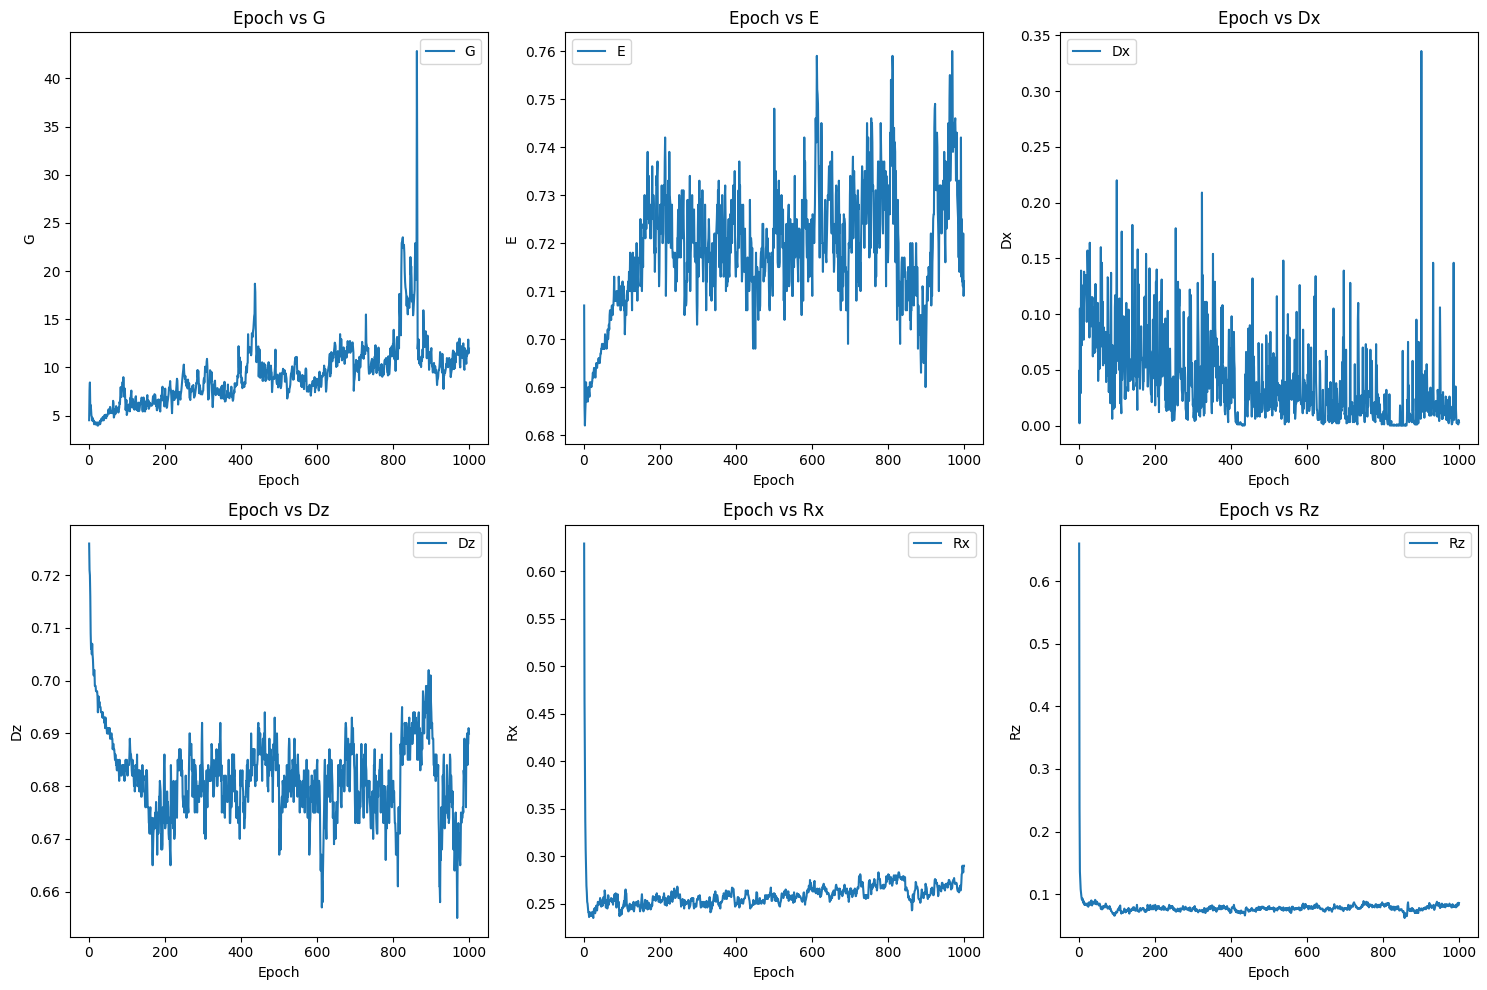

In [1]:
import re
import matplotlib.pyplot as plt

# Open and read the file
with open('/home/karanvora/Documents/New York University/Classes/Semester 2/Deep Learning/Project/PokGAN/AEGAN/AEGAN/AEGAN_PokeGAN_RTX8000_1000_Epochs.result', 'r') as file:
    lines = file.readlines()

# Initialize lists to store data
epochs = []
G_values = []
E_values = []
Dx_values = []
Dz_values = []
Rx_values = []
Rz_values = []

# Regular expression pattern
pattern = re.compile(r"(\d+)/79: G=(\d+\.\d+), E=(\d+\.\d+), Dx=(\d+\.\d+), Dz=(\d+\.\d+)  Rx=(\d+\.\d+)  Rz=(\d+\.\d+)")

for line in lines:
    if line.startswith('Epoch'):
        epoch = int(line.split()[1][:-1])
    match = pattern.search(line)
    if match:
        batch, G, E, Dx, Dz, Rx, Rz = map(float, match.groups())
        if int(batch) == 79:
            epochs.append(epoch)
            G_values.append(G)
            E_values.append(E)
            Dx_values.append(Dx)
            Dz_values.append(Dz)
            Rx_values.append(Rx)
            Rz_values.append(Rz)

# Plotting
metrics = {"G": G_values, "E": E_values, "Dx": Dx_values, "Dz": Dz_values, "Rx": Rx_values, "Rz": Rz_values}

# Create a 2x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for ax, (metric, values) in zip(axs, metrics.items()):
    ax.plot(epochs, values, label=metric)
    ax.set_title(f'Epoch vs {metric}')  # Title of the subplot
    ax.set_xlabel('Epoch')  # X-axis label
    ax.set_ylabel(metric)  # Y-axis label
    ax.legend()  # Show legend

# Automatically adjust subplot parameters for better spacing
plt.tight_layout()
plt.show()  # Display the figure